In [120]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from env import user, password, host

def get_db_url(user, host, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



Has the network latency gone up since we switched internet service providers?

    H0:  There is no change in network latency since we switched internet service providers
    Ha:  There is an increase in latency since we switched internet service providers
        
    True Positive:  we determine latency has changed, and in reality that is true
    True Negative:  we determine latency hasn't changed, and in reality that is true
    
    Type I:  we determine latency has changed, but in reality it hasn't
    Type II: we determine latency hasn't changed, but in reality is has

Is the website redesign any good?

    H0:  There is no change in traffic since the redesign
    Ha:  There is less traffic since the redesign
        
    True Positive:  we determine traffic has changed, and in reality that is true
    True Negative:  we determine traffic hasn't changed, and in reality that is true

    Type I:  we determine traffic has changed, but in reality it hasn't
    Type II: we determine traffic hasn't changed, but in reality is has

Is our television ad driving more sales?

    H0:  There is no increase in sales since the ad aired
    Ha:  There is more sales since the ad aired

    True Positive:  we determine sales have increased, and in reality that is true
    True Negative:  we determine sales haven't increased, and in reality that is true

    Type I:  we determine sales have increased, but in reality they haven't
    Type II: we determine sales havn't increased, but in reality they have 

Ace Realty wants to determine whether the average time it takes to sell homes is different 
for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a 
standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days 
and a standard deviation of 20 days. Use a .05 level of significance.

    H0 = office 1 time to sell is == to office 2
    Ha = office 1 time to sell is != to office 2

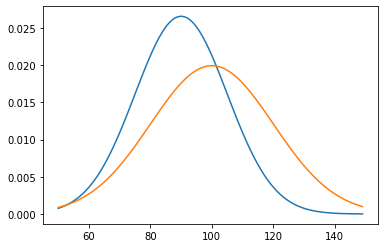

In [2]:
x = np.arange(50,150)
y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)
plt.plot(x,y1, label='y1')
plt.plot(x,y2, label='y2')
plt.show()

In [3]:
t, p = stats.ttest_ind_from_stats(mean1=90.0, std1=15, nobs1=40,
                                  mean2=100, std2=20, nobs2=50,
                                  equal_var=False)

α = .05
t,p

(-2.7091418459143854, 0.00811206270346016)

In [4]:
#is p < α?   if true reject the null

p < α


True

Reject the null hypothosis, the time it takes to sell in office 1 is significantly different from
the time it takes in office 2

# Load the mpg dataset and use it to answer the following questions:


In [5]:
df = data('mpg')

# creating a mpg field averaging the city and hwy mileage
df['mpg'] = (df['cty'] + df['hwy']) / 2

#display first few rows of data
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [6]:
new = df[df.year == 2008]
old = df[df.year == 1999]

α = .05

# find confidence level to determine if variance is True/False
    #H0 variance is equal
    #Ha variance is inqual
stat, p = stats.levene(new.mpg, old.mpg)
p

0.855517569468803

    H0 = 2008 cars have == fuel efficiency to 1999 cars
    Ha = 2008 cars have != fuel efficiency to 1999 cars
    
            p > α so var = True

In [7]:
t, p = stats.ttest_ind(new.mpg, old.mpg, equal_var=True)

In [8]:
# Is the p-value greater than alpha? if so than reject null hyp

p > α

True

We cannot reject the null hypothesis.  There is not a significant difference in fuel-efficiency in cars from 2008 vs 1999

# Are compact cars more fuel-efficient than the average car?


In [9]:
compact = df[df['class'] == 'compact']
α = .05


μth = df.mpg.mean()

    H0 = compact cars are not more fuel efficient than the average car ( mileage <= average )
    Ha = compact cars are more fuel efficient than the average car (mileage > average )

In [10]:
t, p = stats.ttest_1samp(compact.mpg, μth)
t, p

(7.896888573132535, 4.1985637943171186e-10)

In [11]:
if ((p / 2) < α) and (t > 0):
    print('we can reject the null hypothesis')
else: 
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


compact cars are more fuel efficient that the average car



# Do manual cars get better gas mileage than automatic cars?

In [12]:
manual = df[df['trans'].str.contains("manual")]
auto = df[df['trans'].str.contains("auto")]
α = .05

stat, p = stats.levene(manual.mpg, auto.mpg)
p

0.6545276355131857

    H0 = manual cars do not get better gas mileage than automatic cars (manual mpg <= auto mpg)
    Ha = manual cars get better gas mileage than automatic cars (manual mpg >= auto mpg)
    
                p > α so var = True

In [13]:
t, p = stats.ttest_ind(manual.mpg, auto.mpg, equal_var=True)
t,p

(4.593437735750014, 7.154374401145685e-06)

In [14]:
# Is the p-value/2 less than alpha and t > 0? if so than reject null hyp

(p/2 < α) and (t > 0)

True

The null hypothesis is rejected, manual cars get better gas mileage

# Use the telco_churn data. Does tenure correlate with monthly charges? 

In [145]:
# import telco data from the csv file provided and save to dataframe
telco = pd.read_csv('telco_churn - telco_churn.csv')

# drop NAs
telco = telco.dropna()
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- $H_0$: there is no linear relationship between tenure and monthly charges
- $H_a$: there is a linear relationship between tenure and monthly charges


In [146]:
#set the alpha
alpha = .05

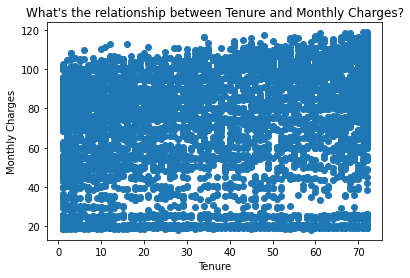

In [147]:
#get columns and plot the data
x = telco.tenure
y = telco.MonthlyCharges

plt.scatter(x, y)

plt.title("What's the relationship between Tenure and Monthly Charges?")
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [148]:
# calculate values
r,p = stats.pearsonr(x,y)
r,p

(0.24686176664089593, 3.989821323249241e-98)

In [149]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis, there is a linear relationship")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship")

We reject the null hypothesis, there is a linear relationship


# Total charges? 

- $H_0$: there is no linear relationship between tenure and Total charges
- $H_a$: there is a linear relationship between tenure and Total charges


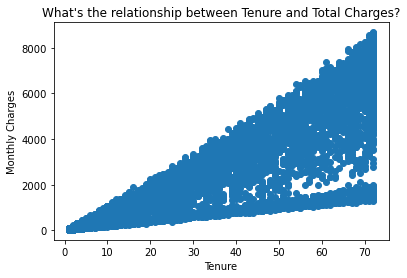

In [150]:
# get columns and plot values
x = telco.tenure
y = telco.TotalCharges

plt.scatter(x, y)

plt.title("What's the relationship between Tenure and Total Charges?")
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

In [151]:
# calculate values
r , p = stats.pearsonr(x,y)
r,p

(0.8258804609332093, 0.0)

In [152]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis, there is a linear relationship")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship")

We reject the null hypothesis, there is a linear relationship


# What happens if you control for phone service?


- $H_0$: there is no linear relationship between tenure and Total charges when controlling for phone service
- $H_a$: there is a linear relationship between tenure and Total charges when controlling for phone service


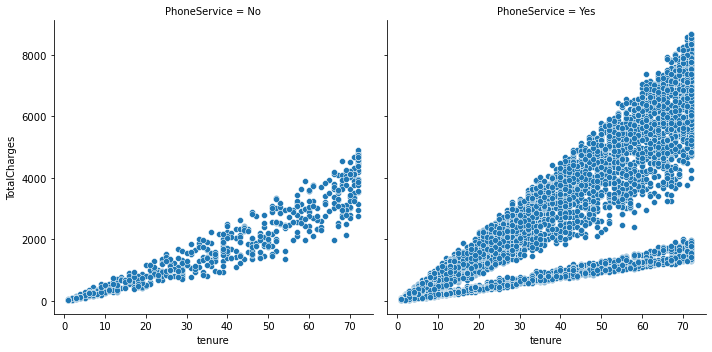

In [153]:
# plot the data seperating for phone service
sns.relplot(data=telco, x='tenure', y='TotalCharges', col='PhoneService')
plt.show()



In [154]:
# calculate values and determine if relationship is linear for those with phone
phone = telco[telco.PhoneService == 'Yes']

x1 = phone.tenure
y1 = phone.TotalCharges

phone_r, phone_p = stats.pearsonr(x1,y1)
phone_r, phone_p

(0.8298393210699484, 0.0)

In [107]:
# calculate values and determine if relationship is linear for those with no phone
no_phone = telco[telco.PhoneService != 'Yes']

x2 = no_phone.tenure
y2 = no_phone.TotalCharges

no_phone_r, no_phone_p = stats.pearsonr(x1,y1)
no_phone_r, no_phone_p = stats.pearsonr(x2,y2)


In [108]:
#evaluate p-value for both
if phone_p < alpha:
    print("We reject the null hypothesis, there is a linear relationship for those with phone service")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship for those with phone service")

if no_phone_p < alpha:
    print("We reject the null hypothesis, there is a linear relationship for those without phone service")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship for those without phone service")

We reject the null hypothesis, there is a linear relationship for those with phone service
We reject the null hypothesis, there is a linear relationship for those without phone service


# What happens if you control for internet service?


- $H_0$: there is no linear relationship between tenure and Total charges when controlling for internet
- $H_a$: there is a linear relationship between tenure and Total charges when controlling for internet


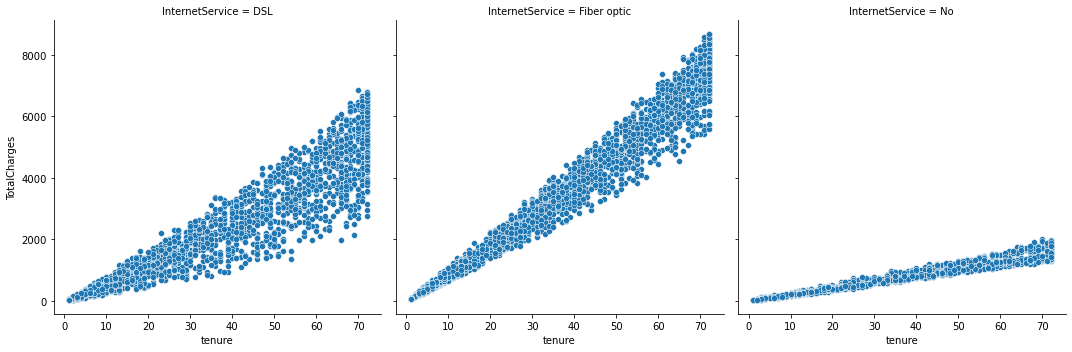

In [109]:
# plot the data seperating for internet service
sns.relplot(data=telco, x='tenure', y='TotalCharges', col='InternetService')
plt.show()

In [116]:
# calculate values and determine if relationship is linear for those with DSL
DSL = telco[telco.InternetService == 'DSL']

x1 = DSL.tenure
y1 = DSL.TotalCharges

DSL_r, DSL_p = stats.pearsonr(x1,y1)
DSL_r, DSL_p

(0.9411848215629796, 0.0)

In [117]:
# calculate values and determine if relationship is linear for those with Fiber
FO = telco[telco.InternetService == 'Fiber optic']

x2 = FO.tenure
y2 = FO.TotalCharges

FO_r, FO_p = stats.pearsonr(x2,y2)
FO_r, FO_p

(0.9853093528070652, 0.0)

In [118]:
# calculate values and determine if relationship is linear for those with no internet
no_int = telco[telco.InternetService == 'No']

x3 = no_int.tenure
y3 = no_int.TotalCharges

none_r, none_p = stats.pearsonr(x3,y3)
none_r, none_p

(0.9814648859044293, 0.0)

In [171]:
# could have used groupby on df to separate phone/internet types, then used a function to .apply to the entire
# dataframe

In [119]:
if DSL_p < alpha:
    print("We reject the null hypothesis, there is a linear relationship for those with DSL service")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship for those with DSL service")

if FO_p < alpha:
    print("We reject the null hypothesis, there is a linear relationship for those with Fiber Optic service")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship for those with Fiber Optic service")
if none_p < alpha:
    print("We reject the null hypothesis, there is a linear relationship for those without internet service")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship for those without internet service")

We reject the null hypothesis, there is a linear relationship for those with DSL service
We reject the null hypothesis, there is a linear relationship for those with Fiber Optic service
We reject the null hypothesis, there is a linear relationship for those without internet service


# Use the employees database.
# Is there a relationship between how long an employee has been with the company and their salary?

In [123]:
# get relavent data from employees database

url = get_db_url(user, host, password, 'employees')
query = '''SELECT emp_no, DATEDIFF(NOW(), hire_date)  as tenure, salary
            FROM employees
            JOIN (
                SELECT emp_no, salary 
                from salaries 
                WHERE to_date > NOW()) AS cur_sals
            USING(emp_no)
            '''
salaries = pd.read_sql(query,url)

In [124]:
salaries.head()

,emp_no,tenure,salary
0,10001,13187,88958
1,10002,13404,72527
2,10003,13124,43311
3,10004,13029,74057
4,10005,12013,94692


- $H_0$: there is no linear relationship between tenure and salary
- $H_a$: there is a linear relationship between tenure and salary

<Figure size 864x432 with 0 Axes>

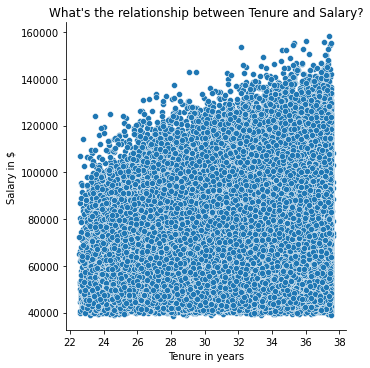

In [172]:
# get columns and plot values
x = salaries.tenure / 365
y = salaries.salary

plt.figure(figsize= (12,6))
sns.relplot(data=salaries, x=x, y=y)
plt.title("What's the relationship between Tenure and Salary?")
plt.xlabel('Tenure in years')
plt.ylabel('Salary in $')
plt.show()

In [129]:
# calculate values
r , p = stats.pearsonr(x,y)
r,p

(0.30646256131860106, 0.0)

In [130]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis, there is a linear relationship between tenure and salary")
else:
    print("We fail to reject the null hypothesis, there is no linear relationship between tenure and salary")

We reject the null hypothesis, there is a linear relationship between tenure and salary


# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [173]:
# get relavent data for current employees 

url = get_db_url(user, host, password, 'employees')

query = '''SELECT emp_no, DATEDIFF(NOW(), hire_date)  as tenure, titles_held
           FROM employees
           JOIN (
               SELECT emp_no, count(title) AS titles_held
               FROM titles
               GROUP BY emp_no) AS title_counts
           USING(emp_no)
           JOIN dept_emp
           USING(emp_no)
           WHERE dept_emp.to_date > NOW()
            '''
titles = pd.read_sql(query,url)

In [174]:
titles.shape

(240124, 3)

- $H_0$: there is no linear relationship between tenure and titles held
- $H_a$: there is a linear relationship between tenure and titles held

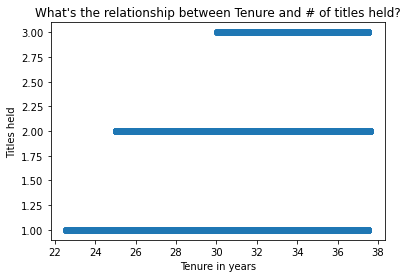

In [155]:
# get columns and plot values
x = titles.tenure / 365
y = titles.titles_held

plt.scatter(x, y)

plt.title("What's the relationship between Tenure and # of titles held?")
plt.xlabel('Tenure in years')
plt.ylabel('Titles held')
plt.show()

In [142]:
# calculate values
r , p = stats.pearsonr(x,y)
r,p

(0.28712678897047295, 0.0)

In [156]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis, there is a linear relationship between tenure and # of titles held")
else:
    print("We fail to reject the null hyp, there is no linear relationship between tenure and # of titles held")

We reject the null hypothesis, there is a linear relationship between tenure and # of titles held


# Use the sleepstudy data. Is there a relationship between days and reaction time?


In [159]:
# get data and look at first few rows
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


- $H_0$: there is no linear relationship between days and reaction time
- $H_a$: there is a linear relationship between days and reaction time

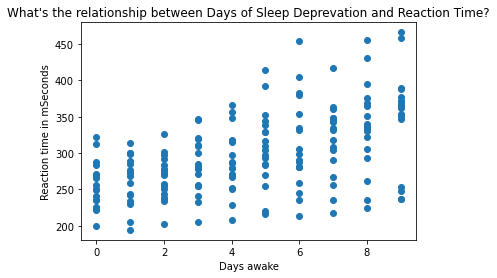

In [161]:
# get columns and plot values
x = sleep.Days
y = sleep.Reaction

plt.scatter(x, y)

plt.title("What's the relationship between Days of Sleep Deprevation and Reaction Time?")
plt.xlabel('Days awake')
plt.ylabel('Reaction time in mSeconds')
plt.show()



# to include regression line use sns.lmplot. ******

In [162]:
# calculate values
r , p = stats.pearsonr(x,y)
r,p

(0.5352302262650255, 9.89409632221439e-15)

In [163]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis, there is a linear relationship between sleep deprivation & reaction time")
else:
    print("We fail to reject the null hyp, there is no linear relationship between sleep deprivation & reaction time")

We reject the null hypothesis, there is a linear relationship between sleep deprivation & reaction time


# X2  Contingency Table Tests

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [191]:
# create np.array with table data
observed = np.array([[49,20],[1,30]])
observed

array([[49, 20],
       [ 1, 30]])

### Form hypothesis

- $H_0$: There is no association between macbook use and being a codeup student (They are independent)
- $H_a$: There is an association between macbook use and being a codeup student (They are not independent)

### Make contigency table

The table created is already a contingency table

### Use stats.chi2_contingency

In [197]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [198]:
print('Observed')
print(observed)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [199]:
if p < alpha:
    print('We reject the null, there is no association between macbook use and being a codeup student')
else:
    print("we fail to reject the null")

We reject the null, there is no association between macbook use and being a codeup student


# Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [206]:
#get data and look for categorical values
df = data('mpg')
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [208]:
# it appears year and drv are categories.  
df.year.value_counts(), df.drv.value_counts()

(1999    117
 2008    117
 Name: year, dtype: int64,
 f    106
 4    103
 r     25
 Name: drv, dtype: int64)

# Form hypothesis

- $H_0$: There is no association between year and drive type (They are independent)
- $H_a$: There is an association between year and drive type (They are not independent)

# Make contigency table

In [211]:
observed = pd.crosstab(df.year, df.drv)
observed

drv,4,f,r
year,,,
1999,49,57,11
2008,54,49,14


# Use stats.chi2_contingency

In [213]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [214]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 57 11]
 [54 49 14]]

Expected
[[51 53 12]
 [51 53 12]]

----
chi^2 = 1.2065
p     = 0.5470


In [215]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis, there is no association between year and drive type")

We fail to reject the null hypothesis


# Use the data from the employees database to answer these questions:



Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees

In [223]:
# get data from employees schema on the codeup data server
query = """
        SELECT emp_no, gender, dept_name
        FROM employees as e
        JOIN dept_emp as de
        USING(emp_no)
        JOIN departments as d
        USING(dept_no)
        WHERE de.to_date > NOW() AND (d.dept_name = 'Sales' or d.dept_name = 'Marketing')
        """
url = get_db_url(user, host, password, 'employees')

df = pd.read_sql(query,url)
df.head()

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing


# Form hypothesis

- $H_0$: There is no association between gender and department (They are independent)
- $H_a$: There is an association between gender and department (They are not independent)

# Make contigency table

In [224]:
# Make contigency table
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


# Use stats.chi2_contingency

In [225]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [226]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [228]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis, there is no association between gender and sales/marketing depts")

We fail to reject the null hypothesis, there is no association between gender and sales/marketing depts


# Is an employee's gender independent of whether or not they are or have been a manager?


In [230]:
# get data from employees schema on the codeup data server
query = """
        SELECT ce.emp_no, ce.gender, dm.emp_no as manager
        FROM 
		(select emp_no, gender
		from employees
		join salaries
		using(emp_no)
		where salaries.to_date > NOW()) as ce
        LEFT JOIN dept_manager as dm
        USING(emp_no)
        """
url = get_db_url(user, host, password, 'employees')

df = pd.read_sql(query,url)
df.head()

,emp_no,gender,manager
0,10001,M,NaN
1,10002,F,NaN
2,10003,M,NaN
3,10004,M,NaN
4,10005,M,NaN


In [232]:
# create column to determine if they have been a manager
df['managerT/F'] = df['manager'].apply(lambda x: True if x > 1 else False)
df['managerT/F'].value_counts()


False    240100
True         24
Name: managerT/F, dtype: int64

# Form hypothesis

- $H_0$: There is no association between gender and manager status (They are independent)
- $H_a$: There is an association between gender and manager status (They are not independent)

# Make contigency table

In [233]:
# Make contigency table
observed = pd.crosstab(df.gender, df['managerT/F'])
observed

managerT/F,False,True
gender,,
F,95997,13
M,144103,11


# Use stats.chi2_contingency

In [234]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [235]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 95997     13]
 [144103     11]]

Expected
[[ 96000      9]
 [144099     14]]

----
chi^2 = 1.4644
p     = 0.2262


In [237]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis, there is no association between gender and manager status")

We fail to reject the null hypothesis, there is no association between gender and manager status
